In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('C:/Users/admin/Admin/Desktop/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


<AxesSubplot:>

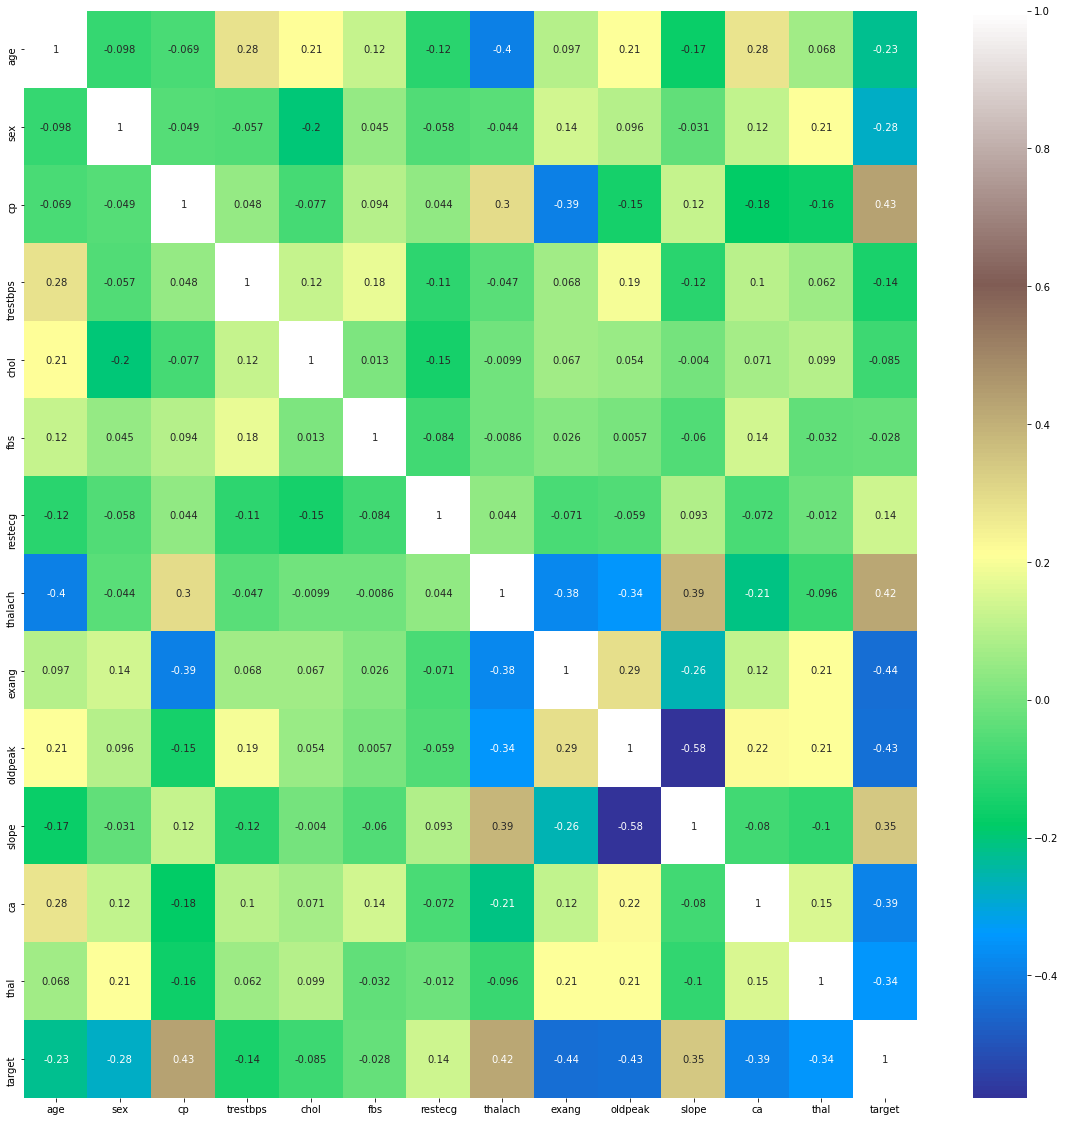

In [9]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot= True, cmap="terrain")

In [ ]:
#We observe positive correlation between target and cp, thalach, slope
#and also negative correlation between target and sex, exang,ca,thai,oldpeak

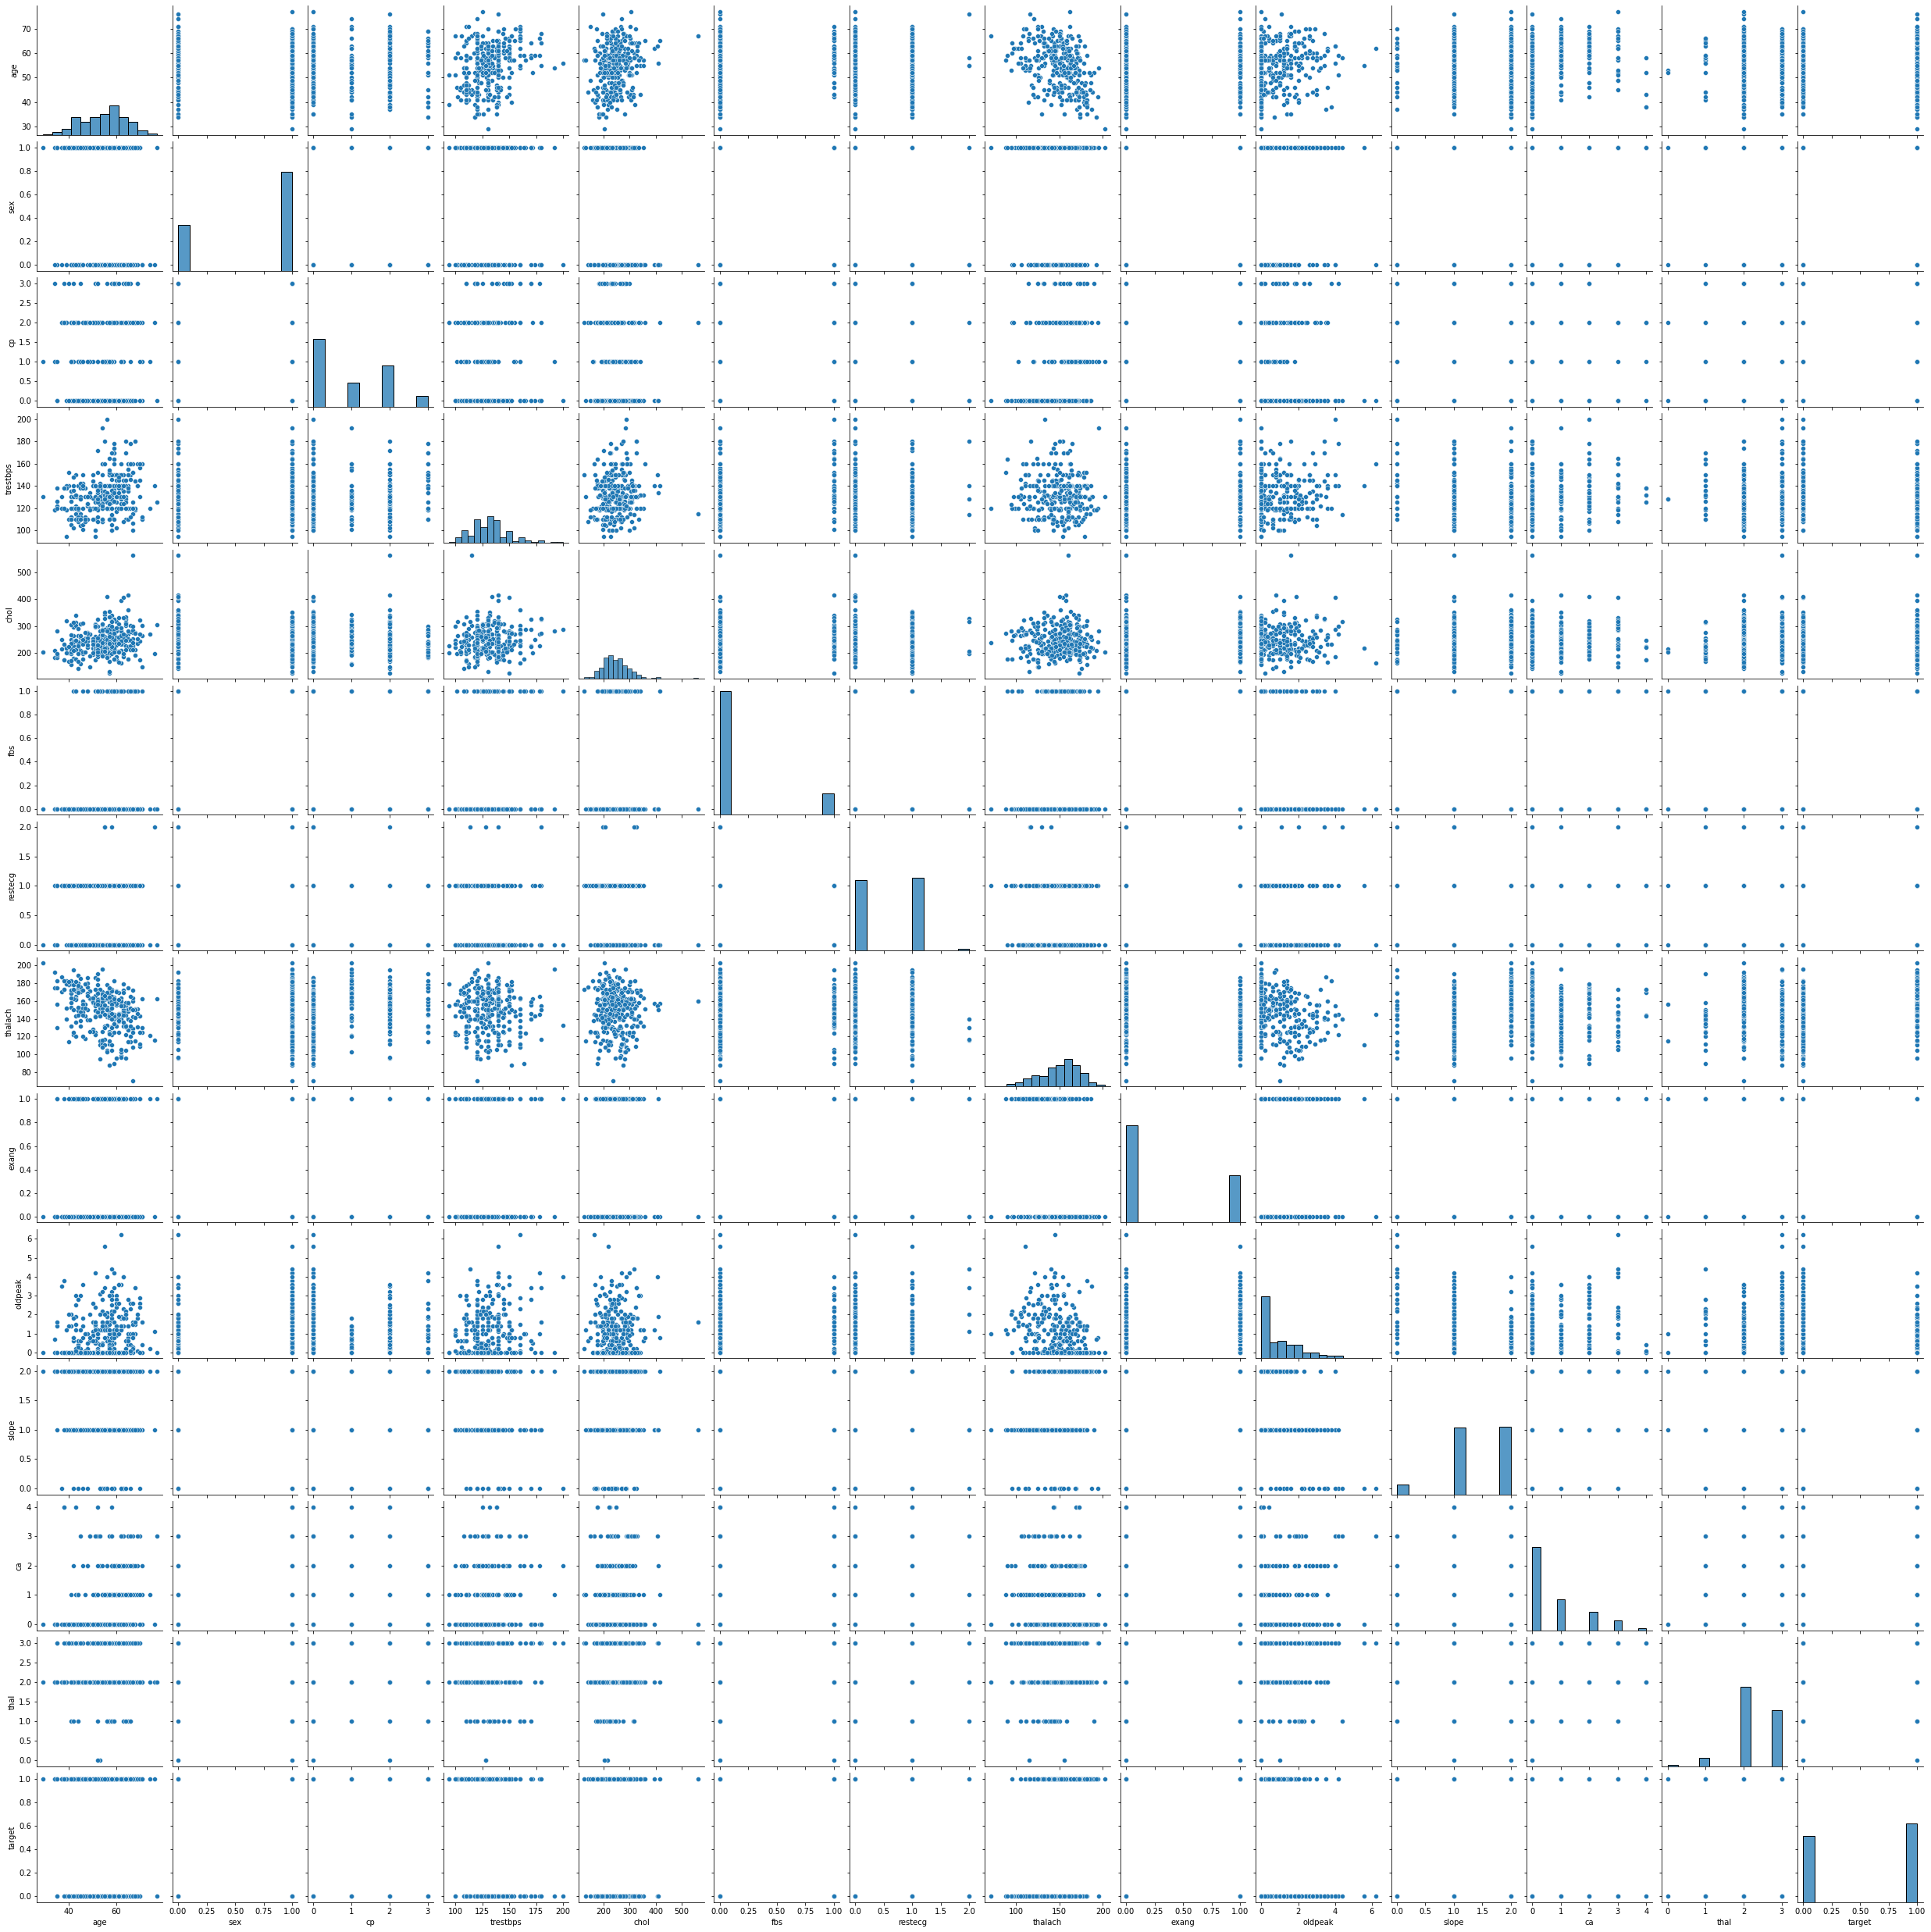

In [10]:
sns.pairplot(data=df)

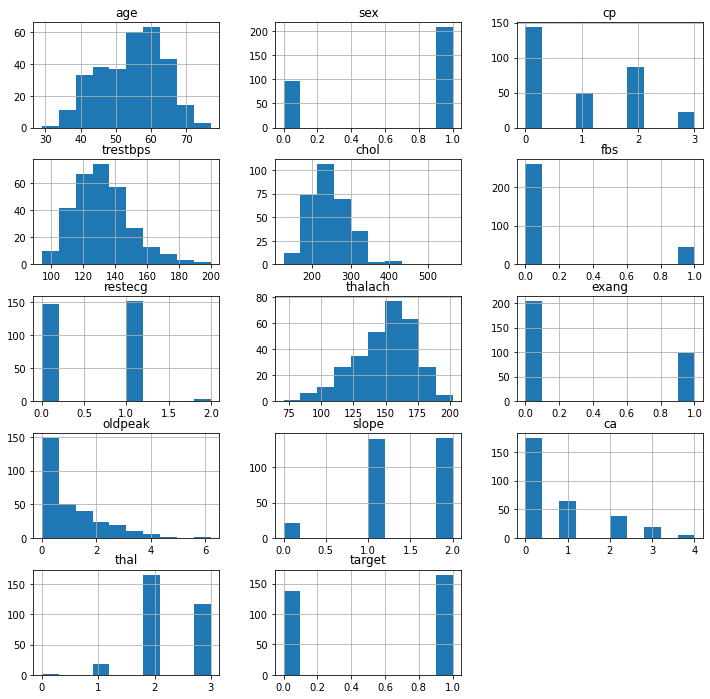

In [11]:
df.hist(figsize=(12,12), layout=(5,3));

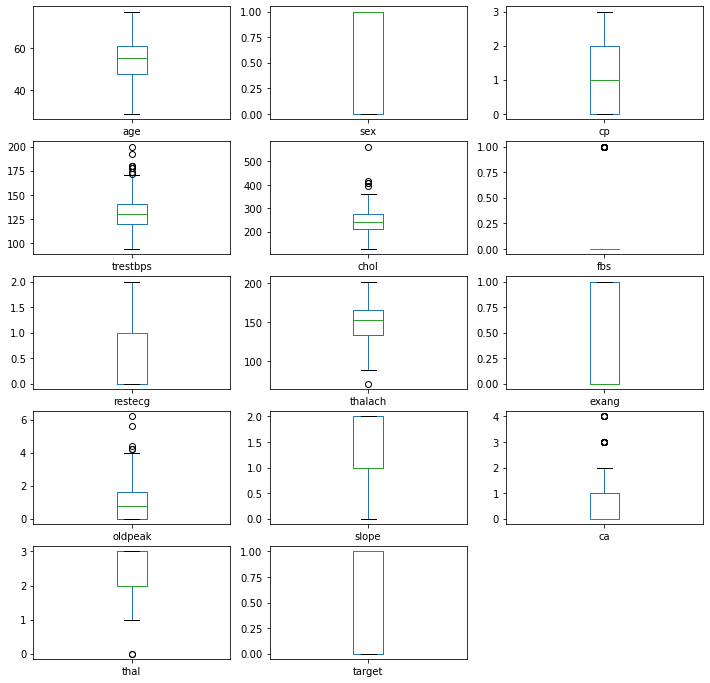

In [13]:
#box amnd whiskers plot
df.plot(kind="box", subplots=True, layout=(5,3), figsize=(12,12))
plt.show()


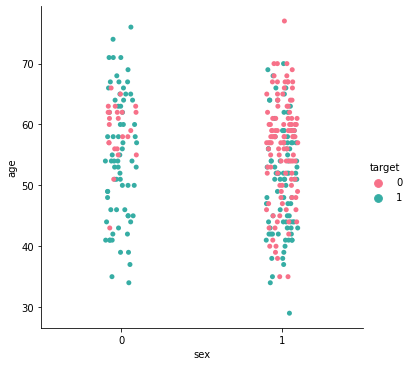

In [15]:
sns.catplot(data=df,x="sex",y="age",hue="target",palette="husl")

<AxesSubplot:xlabel='sex', ylabel='chol'>

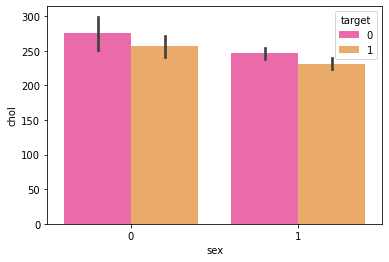

In [16]:
sns.barplot(data=df, x="sex", y="chol", hue="target", palette="spring")

In [17]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [18]:
df['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

<AxesSubplot:xlabel='cp', ylabel='count'>

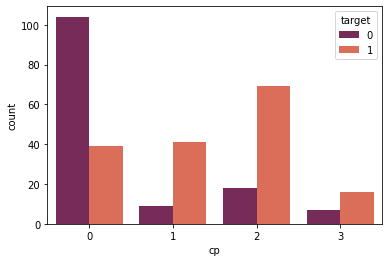

In [19]:
sns.countplot(x="cp", hue="target", data=df, palette="rocket")

In [20]:
gen = pd.crosstab(df['sex'],df['target'])
print(gen)

target    0   1
sex            
0        24  72
1       114  93


<AxesSubplot:xlabel='sex'>

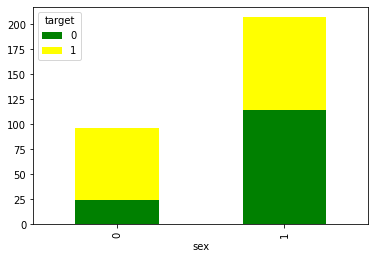

In [22]:
gen.plot(kind='bar',stacked=True, color=['green', 'yellow'], grid=False)

In [24]:
chest_pain = pd.crosstab(df['cp'],df['target'])
chest_pain

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


<AxesSubplot:xlabel='cp'>

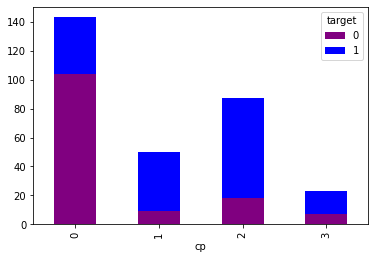

In [25]:
chest_pain.plot(kind="bar", stacked=True, color=["purple", "blue"], grid=False)

In [27]:
#Preparing the data for model
#Scaling the data

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps','chol', 'thalach','oldpeak']
df[columns_to_scale] = StandardScaler.fit_transform(df[columns_to_scale])

In [28]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1


In [30]:
#Preparing ou data for Training
X = df.drop(['target'], axis=1)
y = df['target']

In [32]:
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=40)

In [33]:
print("X_train", X_train.size)
print("X_test", X_test.size)
print("y_train", y_train.size)
print("y_test", y_test.size)

X_train 2756
X_test 1183
y_train 212
y_test 91


In [35]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model1 = lr.fit(X_train,y_train)
prediction1 = model1.predict(X_test)

In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, prediction1)
cm

array([[36,  4],
       [ 3, 48]], dtype=int64)

<AxesSubplot:>

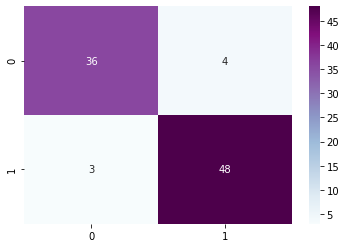

In [39]:
sns.heatmap(cm, annot= True, cmap="BuPu")

In [40]:
TP = cm[0][0]
TN = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]
print("Testing Accuracy: ", (TP+TN)/(TP+TN+FN+FP))

Testing Accuracy:  0.9230769230769231


In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction1)

0.9230769230769231

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction1))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91        40
           1       0.92      0.94      0.93        51

    accuracy                           0.92        91
   macro avg       0.92      0.92      0.92        91
weighted avg       0.92      0.92      0.92        91

